<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/Estrutura_de_Dados_CNIS_para_revisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PENDENTE DISPONIBILIZAR OS ARQUIVOS .XLSX**

#Tarefa 2 - Organização com Chaves: CPF e Seq



Dúvida: por onde começar as rotinas de extração?
O grupo definiu as chaves como seq e cpf

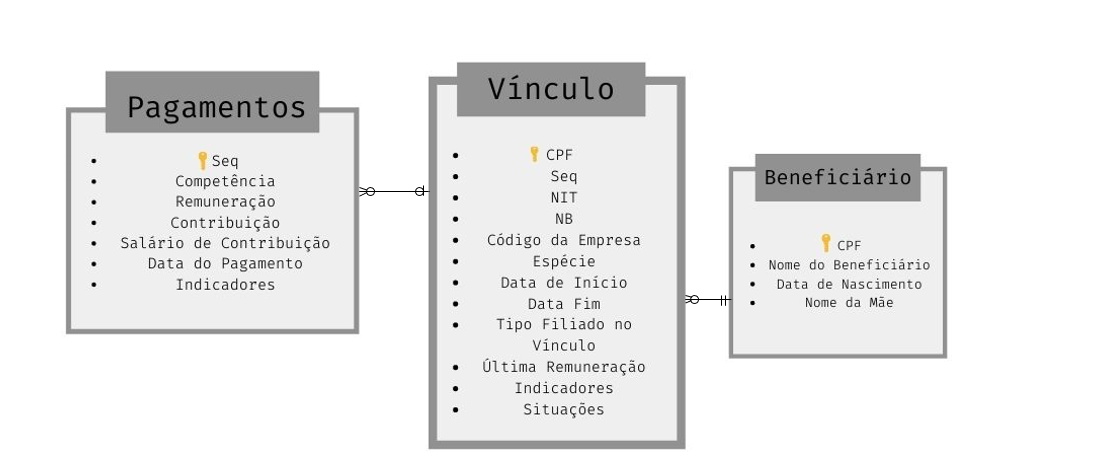

###Importando SQL e Pandas

In [ ]:
!pip install db-sqlite3

     |████████████████████████████████| 171 kB 5.0 MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1795 sha256=7900665599a1ebd119754e3ddb1bb0d23a8108a0be156143636cafd759390741
  Stored in directory: /root/.cache/pip/wheels/02/38/d5/2f54461050571bf5330fee2a37ab1c9b5e7540b0572f1acdab
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3894 sha256=b1c4936c2bd7dac74a236256753f151c233ac519668b0cbbe57049164f079541
  Stored in directory: /root/.cache/pip/wheels/8e/97/82/741d2b360507411ec233d0280d7371faa94b03bde834e4a9be
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31678 sha256=9733b14c3ca1d2070dc5cb855b25bae03746130510da50f6ef47a204213fc546
  Stored in directory: /root/.cache/pip/wheels/c5/43/70/e9729370cfff40c49d3e3d05377d54b3ecd71f64e62341ea80
Successfully built db-sqlite3 db antiorm


In [ ]:
import pandas as pd
import sqlite3

###Tabela com informações do benefeciário
*   **CPF (Chave Primária)**
*   Nome do Beneficiário
*   Data de Nascimento
*   Nome da Mãe









In [ ]:
info2 = pd.read_excel('/content/CNIS Cláudia - Informação do Beneficiário.xlsx')
info2.head()

FileNotFoundError: ignored

###Tabela com infomrações do vínculo
*   **CPF** 
*   **Seq**
*   NIT
*   NB
*   Código da Empresa
*   Espécie
*   Data de Início
*   Data Fim
*   Tipo Filiado no Vínculo
*   Última Remuneração
*   Indicadores
*   Situações














In [ ]:
vinculo2 = pd.read_excel('/content/CNIS Cláudia - Informações do Vínculo.xlsx')
vinculo2.head()

###Junção das informações do beneficiário e do vínculo

*   **CPF (Chave Estrangeira)** 
*   Nome do Beneficiário
*   Data de Nascimento
*   Nome da Mãe
*   **Seq**
*   NB
*   Código da Empresa
*   Espécie
*   Data de Início
*   Data Fim
*   Tipo Filiado no Vínculo
*   Última Remuneração
*   Indicadores
*   Situações




In [ ]:
info_vinculo2 = pd.merge(info2, vinculo2, on='CPF')
info_vinculo2

###Tabela com informações dos pagamentos
*   **Seq (Chave primária)**
*   Competência
*   Remuneraçao
*   Contribuição
*   Salário de Contribuição
*   Data do Pagamento
*   Indicadores


In [ ]:
remunerações = pd.read_excel('/content/CNIS Cláudia - Remunerações.xlsx')
remunerações.head()

###Junção das inforamções do benefeciário com as do vínculo e das remunerações
*   **CPF** **(Chave Estrangeira)**
*   Nome do Beneficiário
*   Data de Nascimento
*   Nome da Mãe
*   **Seq** **(Chave Estrangeira)**
*   NB
*   Código da Empresa
*   Espécie
*   Data de Início
*   Data Fim
*   Tipo Filiado no Vínculo
*   Última Remuneração
*   Indicadores
*   Situações
*   Competência
*   Remuneraçao
*   Contribuição
*   Salário de Contribuição
*   Data do Pagamento
*   Indicadores




In [ ]:
info_vinculo_remunerações = pd.merge(info_vinculo2, remunerações, on='Seq')
info_vinculo_remunerações

In [ ]:
info_vinculo_remunerações.fillna("-") #Retirando os valores nulos

##Exemplos


###Exemplo 1 - CNIS Cristina

In [ ]:
infoex1 = pd.read_excel('/content/Crisitna - Informações do Beneficiário.xlsx') #Lendo o CNIS
vinculoex1 = pd.read_excel('/content/Cristina - Informações do Vínculo.xlsx')
remuneraçõesex1 = pd.read_excel('/content/Crisitna - Remunerações.xlsx')

ex1info_vinculo = pd.merge(infoex1, vinculoex1, on='CPF') #Informações do Beneficiário + Informações do Vínculo - Chave Estrangeira: CPF
ex1info_vinculo_remunerações = pd.merge(ex1info_vinculo, remuneraçõesex1, on='Seq') #Informações do Beneficiário + Vínculo + Pagamentos - Chave Estrangeira: Seq
ex1info_vinculo_remunerações

ex1info_vinculo_remunerações.fillna("-") #Retirando os valores nulos

### Exemplo 2 - CNIS 

In [ ]:
infoex2 = pd.read_excel('/content/CNIS Caio - Informação do Beneficiário.xlsx') #Lendo o CNIS
vinculoex2 = pd.read_excel('/content/CNIS Caio - Informações do Vínculo.xlsx')
remuneraçõesex2 = pd.read_excel('/content/CNIS Caio - Remunerações.xlsx')

ex2info_vinculo = pd.merge(infoex2, vinculoex2, on='CPF') #Informações do Beneficiário + Informações do Vínculo - Chave Estrangeira: CPF
ex2info_vinculo_remunerações = pd.merge(ex2info_vinculo, remuneraçõesex2, on='Seq') #Informações do Beneficiário + Vínculo + Pagamentos - Chave Estrangeira: Seq
ex2info_vinculo_remunerações

ex2info_vinculo_remunerações.fillna("-") #Retirando os valores nulos